In [5]:
import os,re
import requests as rq
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import json
from netwulf import visualize
import community

In [34]:
#Get requests response "Failed to establish a new connection: [Errno -2]"
url_web = "https://raw.githubusercontent.com/hyharryhuang/AFINN-json/master/AFINN.json"
#We are going to hardcode the Afinn-111 json

afinn_data = rq.get(url_web).json()

In [35]:
score_word_dict = dict(afinn_data) #negative word dictionary

In [36]:
#add firearms
firearm_url = "https://genius.com/Rap-genius-firearms-and-firearm-companies-mentioned-in-rap-lyrics"
scrape_words = getLyrics(firearm_url)
firearm_list = scrape_words[130:].split("\n")

#add firearms in dictionary with sentiment score of -4
for firearm in firearm_list:
    score_word_dict[firearm.lower()] = -4

NameError: name 'getLyrics' is not defined

In [37]:
#add bulleted lists on rapgenius to a list that is returned and adds to score_word_dict
#needs score_word_dict to word, and adds the sentiment of that word (number)
def add_bulleted_lists(URL, number):
    words_drug = getLyrics(URL)
    first_list = words_drug.split("\n")
    new_list = []

    for x in first_list:
        new_list.append(x.replace(u'\u2022 ', ''))

    #add drugs in dictionary with sentiment score of -1
    for thing in new_list:
        score_word_dict[thing.lower()] = number

In [54]:
slang_drugs_url = "https://genius.com/Rap-genius-slang-dictionary-drugs-lyrics"
slang_firearms_url = "https://genius.com/Rap-genius-slang-dictionary-firearms-lyrics"

#adds words into sentiment dictionary
add_bulleted_lists(slang_drugs_url, -2)
add_bulleted_lists(slang_firearms_url, -4)

In [38]:
def sentimentAnalysis(song):
    lyrics_list = song.split(" ")
    value = 0
    senti = 0
    for word in lyrics_list:
        if word in score_word_dict:
            value = value + int(score_word_dict[word])
        else:
            continue
        senti = value / (1.0 * len(lyrics_list))
    return senti

In [39]:
def get_bfl(artist):
    with open("data/lyrics/%s.txt" % artist, 'r') as f:
        info = eval(f.read())
    big_string = ""
    for album in info:
        for track in album['tracks']:
            big_string += track['lyrics']
    return big_string

In [29]:
sentimentAnalysis(get_bfl("Chance the rapper"))

NameError: name 'score_word_dict' is not defined

In [40]:
def get_rappers():
    
    def validate(name):
        # checks if the name has a
        illegal_chars = "|?:^*\""

        for c in illegal_chars:
            if c == '|':
                if name.find(c) > 0:
                    name = name.split("|")[1]
            if c == "\"":
                if name.find(c) > 0:
                    name = name.replace(r'"','',2)
            else: 
                name = name.replace(c,'')
        return name
    
#     with open("data/rappers.txt", "r", encoding='utf-8') as f:
#         rappers = f.read()
    rappers = [c[:-4] for c in os.listdir('data/lyrics')]
    return [validate(rapper).strip() for rapper in rappers][1:]
rappers = get_rappers()

In [41]:
def find_collaborators(r):
    with open(("data/albums/%s.txt" % r), "r", encoding='utf-8') as fp:
        albums = eval(fp.read())
        
    artists = []
    for album in albums: 
        for artist in album['tracks']:
            for a in artist['collaborators']:
                artists.append(a)
    return artists

In [42]:
def get_collaborator_count(collaborators, r):
    #creating a dictionary from the collaborators to count the number of collaborations for weighted edges
    col_dict = {}
    for c in collaborators:
        #don't include self as a rapper
        if c == r: 
            continue
        #add new collaborators to the dict with a count of 1
        if c not in col_dict: 
            col_dict[c] =  1
        #add one to the count of previous collaborators
        else: 
            col_dict[c] += 1
    return col_dict  

In [43]:
def save_network(network):
    with open(('data/networks/%s.json' % network), 'w') as fp:
        return json.dump(nx.node_link_data(network), fp)

In [60]:
def get_senti(rapper):
    with open('data/senti.txt', "r") as fp:
        senti_scores = eval(fp.read())
    senti_score = senti_scores[rapper]
    return senti_score

In [61]:
scores = []
for r in rappers:
    try:
        scores.append(get_senti(r))
    except KeyError:
        print ("Unable to find score for %s" % r)

Unable to find score for 03 Greedo
Unable to find score for 100 Kila
Unable to find score for 12 Gauge
Unable to find score for 2$ Fabo
Unable to find score for A$AP Ferg
Unable to find score for A$AP Nast
Unable to find score for A$AP Rocky
Unable to find score for A$AP Yams
Unable to find score for A$ton Matthews
Unable to find score for A+
Unable to find score for A-Q
Unable to find score for Adam Saleh
Unable to find score for Agallah
Unable to find score for Ahmad Lewis
Unable to find score for Aminé
Unable to find score for Amir Obè
Unable to find score for Ampichino
Unable to find score for André 3000
Unable to find score for Angie Martinez
Unable to find score for Anthony Parker
Unable to find score for Antoinette
Unable to find score for Anybody Killa
Unable to find score for Arabian Prince
Unable to find score for Arin Hanson
Unable to find score for Baby D
Unable to find score for Baka Not Nice
Unable to find score for Bang Yong-guk
Unable to find score for Bangladesh
Unable

In [9]:
def get_lim_artists():
    with open('data/senti.txt', "r") as fp:
        senti_scores = eval(fp.read())
    return senti_scores.keys()
lim_artists = get_lim_artists()        

In [71]:
import seaborn as sns
sns.set()

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  2.,  5.,  4.,  3.,
         9., 13., 14., 10., 15., 20., 19., 16., 13., 12.,  7.,  3.,  1.,
         1.,  1.,  1.,  1.]),
 array([-3.51694915e-01, -3.36416196e-01, -3.21137476e-01, -3.05858757e-01,
        -2.90580038e-01, -2.75301318e-01, -2.60022599e-01, -2.44743879e-01,
        -2.29465160e-01, -2.14186441e-01, -1.98907721e-01, -1.83629002e-01,
        -1.68350282e-01, -1.53071563e-01, -1.37792844e-01, -1.22514124e-01,
        -1.07235405e-01, -9.19566855e-02, -7.66779661e-02, -6.13992467e-02,
        -4.61205273e-02, -3.08418079e-02, -1.55630885e-02, -2.84369115e-04,
         1.49943503e-02,  3.02730697e-02,  4.55517891e-02,  6.08305085e-02,
         7.61092279e-02,  9.13879473e-02,  1.06666667e-01]),
 <a list of 30 Patch objects>)

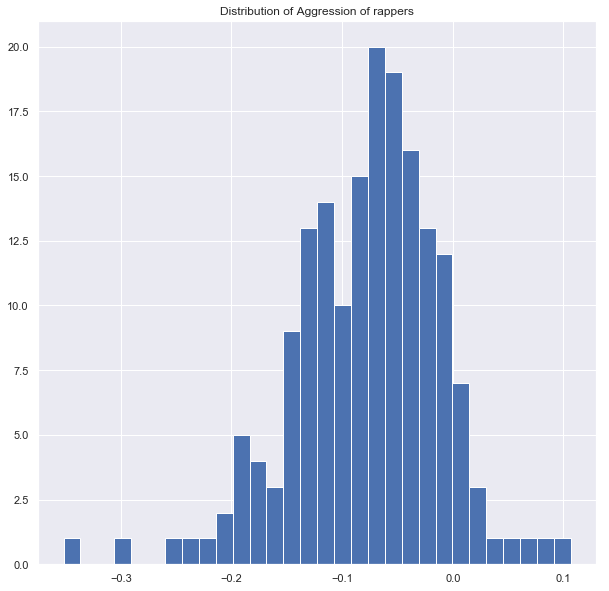

In [74]:
plt.figure(figsize=(10,10))
plt.title("Distribution of Aggression of rappers")
plt.hist(scores, bins=30)

In [10]:
def create_network(rappers, network): 
    
    errors = []
    for r in list(rappers):
        try: 
            #get the collaborators from the data file in a list 
            collaborators = find_collaborators(r)
            
        except IndexError: 
            errors.append(r)
            continue
        except SyntaxError:
            errors.append(r)
            continue
        
        col_dict = get_collaborator_count(collaborators, r)
        
        for c in set(collaborators):
            #don't include self as a collaborator
            if c == r: 
                continue
            if c not in list(rappers):
                continue
            else:
                #get the weight for the edge as number of collaborations from dict
                w = col_dict[c]
                #add the weighted edges
                network.add_edge(r,c,weight=w)

                if network.degree(c) == 1 and w == 1:
                    network.remove_node(c)
    
    #sort the network into communities using the python-louvain method
    bb = community.best_partition(network)  # dict of node-community pairs
    nx.set_node_attributes(network, bb, 'group')
    
    #save the network data in a file so that you can look at it later
    return save_network(network)
    
   

In [11]:
def create_agg_network(rappers, network): 
    
    errors = []
    for r in list(rappers):
        try: 
            #get the collaborators from the data file in a list 
            collaborators = find_collaborators(r)
            
        except IndexError: 
            errors.append(r)
            continue
        except SyntaxError:
            errors.append(r)
            continue
        
        col_dict = get_collaborator_count(collaborators, r)
        
        for c in set(collaborators):
            #don't include self as a collaborator
            if c == r: 
                continue
            if c not in list(rappers):
                continue
            else:
                #get the weight for the edge as number of collaborations from dict
                w = col_dict[c]
                s = get_senti(r)
                #add the weighted edges
                network.add_edge(r,c,weight=w, node_size=s)

                if network.degree(c) == 1 and w == 1:
                    network.remove_node(c)
    
    #sort the network into communities using the python-louvain method
    bb = community.best_partition(network)  # dict of node-community pairs
    nx.set_node_attributes(network, bb, 'group')
    
    #save the network data in a file so that you can look at it later
    return save_network(network)

In [71]:
collaboration_network_senti_reg = nx.Graph()
comms = create_network(lim_artists, collaboration_network_senti_reg)

In [79]:
collaboration_network_senti_reg.node['Braille']['sentiment'] = get_senti

KeyError: 'Braille'

In [178]:
with open('rappers_network.json', 'w') as fp:
    json.dump(nx.node_link_data(collaboration_network), fp)

In [72]:
with open('rappers_network_senti_reg.json', 'w') as fp:
    json.dump(nx.node_link_data(collaboration_network_senti_reg), fp)

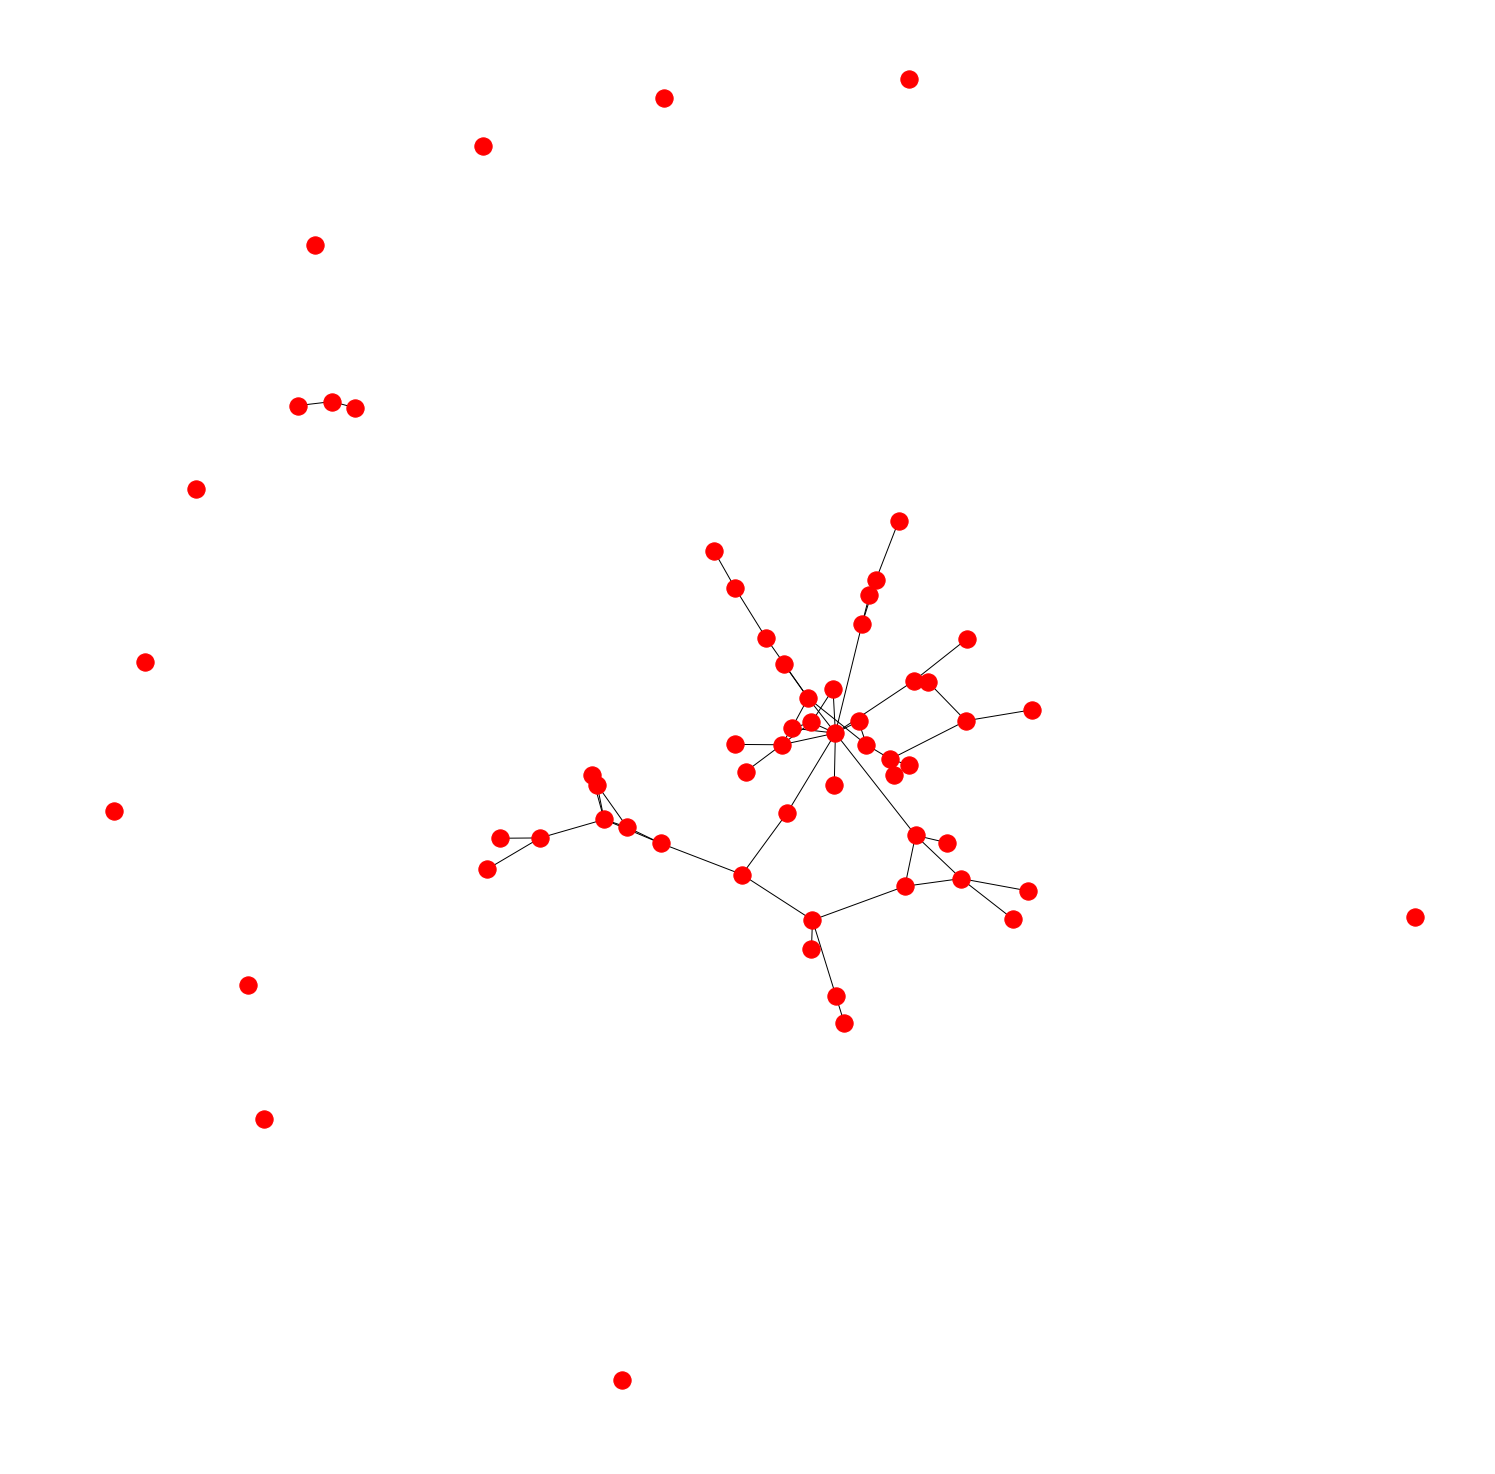

In [78]:
plt.figure(figsize=[20,20])
nx.draw(collaboration_network_senti)
plt.show()

In [30]:
!git pull origin master

Updating b2ba7ec..a599cb7
Fast-forward
 .ipynb_checkpoints/get_lyrics-checkpoint.ipynb     |    6 +
 Untitled.ipynb                                     |   10 +-
 .../.ipynb_checkpoints/12 Gauge-checkpoint.txt     |    1 +
 .../.ipynb_checkpoints/03 Greedo-checkpoint.txt    |    1 +
 .../.ipynb_checkpoints/100 Kila-checkpoint.txt     |    1 +
 data/lyrics/.ipynb_checkpoints/100s-checkpoint.txt |    1 +
 .../.ipynb_checkpoints/2 Chainz-checkpoint.txt     |    1 -
 .../.ipynb_checkpoints/2 Pistols-checkpoint.txt    |    1 +
 .../.ipynb_checkpoints/21 Savage-checkpoint.txt    |    1 +
 data/lyrics/.ipynb_checkpoints/2Mex-checkpoint.txt |    1 +
 .../A Boogie wit da Hoodie-checkpoint.txt          |    1 +
 .../.ipynb_checkpoints/A$AP Rocky-checkpoint.txt   |    1 +
 data/lyrics/.ipynb_checkpoints/A+-checkpoint.txt   |    0
 .../.ipynb_checkpoints/Battlecat-checkpoint.txt    |    1 +
 ...-checkpoint.txt => Benny Blanco-checkpoint.txt} |    0
 .../Big Daddy Kane-checkpoint.txt               

From https://github.com/allengueco/rap_aggression
 * branch            master     -> FETCH_HEAD
   b2ba7ec..a599cb7  master     -> origin/master
